<a href="https://colab.research.google.com/github/xiaxiazainuli/deepchem/blob/master/%E5%BF%85%E9%A1%BB%E4%BF%9D%E7%95%99%E7%89%88%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 19.4 MB/s eta 0:00:00


In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
pip install scikit-learn

In [ ]:
pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.8 MB/s eta 0:00:00


In [ ]:
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem as ch
from rdkit.Chem import Draw as d
from rdkit import DataStructs
import pandas as pd
from rdkit.Chem import rdMolDescriptors as rdescriptors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import csv
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
import sklearn
from rdkit.Chem import PandasTools, Descriptors, MolFromSmiles
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from rdkit import Chem
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import torch
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_path = '/content/drive/My Drive/bixuchenggong.CSV'
df = pd.read_csv(csv_path, usecols=[1, 2, 3])
df.iloc[24:30]

,name,activity,smiles
24,6b,1,ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCCCN)CC2)C=...
25,6c,1,ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCCCCCN)CC2)...
26,6d,1,ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCN4CCNCC4)C...
27,7,0,ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](N)CC2)C=C1Cl
28,8a,0,ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NC(C[H])=O)C...
29,8b,0,ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NC(CCCCl)=O)...


In [ ]:
with open ('/content/drive/My Drive/bixuchenggong.CSV', 'r') as f:
    content_raw = list((csv.reader(f, delimiter = '\t')))
len(content_raw)

169

    num name  activity                                             smiles
0     1  ser         1    ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NC)CC2)C=C1Cl
21   22   5t         1  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCN4CCN(C(OC...
23   24   6a         1            CC(C(C)=C1)=CC=C1C2C3=CC=CC=C3C(NCN)CC2
24   25   6b         1  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCCCN)CC2)C=...
25   26   6c         1  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCCCCCN)CC2)...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   num       168 non-null    int64 
 1   name      168 non-null    object
 2   activity  168 non-null    int64 
 3   smiles    168 non-null    object
 4   CLS       168 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.7+ KB
None


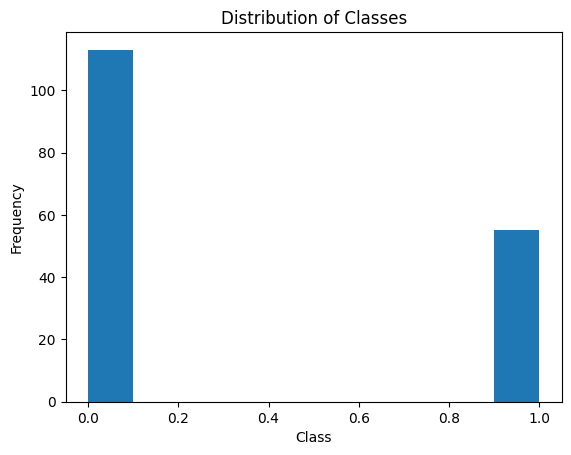

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设您的数据集保存在一个名为 "your_dataset.csv" 的CSV文件中
# 读取数据集
df = pd.read_csv("/content/drive/My Drive/bixuchenggong.CSV")
active_samples = df[df['activity'] == 1]
print(active_samples.head())

# 将活性为1的标记为"active"，活性为0的标记为"inactive"
df['CLS'] = df['activity'].apply(lambda x: 1 if x == 1 else 0)

# 查看数据集信息activity
print(df.info())

# 绘制直方图
plt.hist(df['CLS'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Classes')
plt.show()

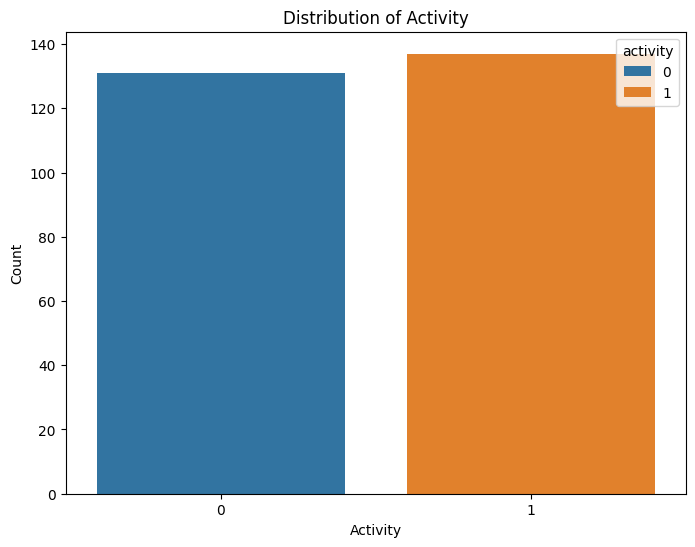

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据集
data = pd.read_csv("/content/drive/My Drive/bixuchenggong11.CSV")

# 分离数据集为有活性和没活性
active_data = data[data['activity'] == 1]
inactive_data = data[data['activity'] == 0]

# 计算抽样数量，使得非活性数据和活性数据数量相等
num_samples_to_keep = min(len(active_data), len(inactive_data))
sampled_inactive_data = inactive_data.sample(n=num_samples_to_keep, random_state=42)


# 设置图形大小
plt.figure(figsize=(8, 6))

# 使用 seaborn 的 countplot 函数同时绘制活性和非活性数据的计数直方图
sns.countplot(data=sampled_data, x='activity', hue='activity')

# 添加标题和标签
plt.title('Distribution of Activity')
plt.xlabel('Activity')
plt.ylabel('Count')

# 显示图形
plt.show()






In [ ]:
import pandas as pd

# 读取数据集
data = pd.read_csv("/content/drive/My Drive/bixuchenggong.CSV")

# 分离数据集为有活性和没活性
# 分离数据集为有活性和没活性
active_data = data[data['activity'] == 1]
inactive_data = data[data['activity'] == 0]

# 计算抽样数量，使得非活性数据和活性数据数量相等
num_samples_to_keep = min(len(active_data), len(inactive_data))
sampled_inactive_data = inactive_data.sample(n=num_samples_to_keep, random_state=42)

# 合并样本
sampled_data = pd.concat([active_data, sampled_inactive_data])

# 输出抽样后的数据集
print(sampled_data.head())


# 输出抽样后的数据集
print(sampled_data)

    num name  activity                                             smiles
0     1  ser         1    ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NC)CC2)C=C1Cl
21   22   5t         1  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCN4CCN(C(OC...
23   24   6a         1            CC(C(C)=C1)=CC=C1C2C3=CC=CC=C3C(NCN)CC2
24   25   6b         1  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCCCN)CC2)C=...
25   26   6c         1  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCCCCCN)CC2)...
     num name  activity                                             smiles
0      1  ser         1    ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NC)CC2)C=C1Cl
21    22   5t         1  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCN4CCN(C(OC...
23    24   6a         1            CC(C(C)=C1)=CC=C1C2C3=CC=CC=C3C(NCN)CC2
24    25   6b         1  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCCCN)CC2)C=...
25    26   6c         1  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCCCCCN)CC2)...
..   ...  ...       ...                                                ...
58    59  29a         0  ClC1=C

In [ ]:
# 检查抽样后的数据集 sampled_data 的前几行
print("Sampled Data Head:")
print(sampled_data.head())

# 检查抽样后的数据集 sampled_data 的基本信息
print("\nSampled Data Info:")
print(sampled_data.info())

# 检查抽样后的数据集 sampled_data 的描述性统计信息
print("\nSampled Data Describe:")
print(sampled_data.describe())

Sampled Data Head:
    num name  activity                                             smiles
0     1  ser         1    ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NC)CC2)C=C1Cl
21   22   5t         1  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCN4CCN(C(OC...
23   24   6a         1            CC(C(C)=C1)=CC=C1C2C3=CC=CC=C3C(NCN)CC2
24   25   6b         1  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCCCN)CC2)C=...
25   26   6c         1  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCCCCCN)CC2)...

Sampled Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 18
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   num       150 non-null    int64 
 1   name      150 non-null    object
 2   activity  150 non-null    int64 
 3   smiles    150 non-null    object
dtypes: int64(2), object(2)
memory usage: 5.9+ KB
None

Sampled Data Describe:
              num    activity
count  150.000000  150.000000
mean   102.533333    0.500000
std     61.047090    0

In [ ]:
import rdkit.Chem as ch
import pandas as pd
names = []
activities = []
smiles = []
mols = []

import pandas as pd
from rdkit import Chem

# 从样本数据中提取名称、活性和SMILES列
names = sampled_data['name'].tolist()
activities = sampled_data['activity'].tolist()
smiles = sampled_data['smiles'].tolist()

# 初始化分子列表
mols = []

# 遍历 SMILES 列表，转换为分子对象
for smile in smiles:
    mol = Chem.MolFromSmiles(smile)
    if mol:
        mols.append(mol)
    else:
        print(f"Invalid SMILES: {smile}")

# 创建 DataFrame
dataframe_features = pd.DataFrame({'Name': names, 'Activity': activities, 'SMILES': smiles})

# 打印 DataFrame
print(dataframe_features)

    Name  Activity                                             SMILES
0    ser         1    ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NC)CC2)C=C1Cl
1     5t         1  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCN4CCN(C(OC...
2     6a         1            CC(C(C)=C1)=CC=C1C2C3=CC=CC=C3C(NCN)CC2
3     6b         1  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCCCN)CC2)C=...
4     6c         1  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCCCCCN)CC2)...
..   ...       ...                                                ...
145   5h         0  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NC4=CC=CC=C4...
146   5m         0  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NC4=CC(OCO5)...
147  92a         0  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](N(C4CC4)CC5=...
148   5c         0  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCCCCC)CC2)C...
149   5q         0  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCNC(OC(C)(C...

[150 rows x 3 columns]


In [ ]:
import rdkit.Chem as Chem

# 定义一个函数来提取分子中的氢键数量
def extract_hydrogen_bonds_count(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        # 使用 GetSubstructMatches 函数查找分子中的氢键
        hydrogen_bonds = mol.GetSubstructMatches(Chem.MolFromSmarts('[OH]'))
        if hydrogen_bonds:
            return len(hydrogen_bonds)
        else:
            return 0  # 没有找到氢键，返回数量为 0
    else:
        print("Invalid SMILES:", smiles)
        return None

# 提取每个化合物的氢键数量
hydrogen_bonds_counts = [extract_hydrogen_bonds_count(sm) for sm in smiles]

# 打印氢键数量
for i, count in enumerate(hydrogen_bonds_counts):
    print(f"SMILES {i+1}: Hydrogen bonds count = {count}")

SMILES 1: Hydrogen bonds count = 0
SMILES 2: Hydrogen bonds count = 0
SMILES 3: Hydrogen bonds count = 0
SMILES 4: Hydrogen bonds count = 0
SMILES 5: Hydrogen bonds count = 0
SMILES 6: Hydrogen bonds count = 0
SMILES 7: Hydrogen bonds count = 0
SMILES 8: Hydrogen bonds count = 0
SMILES 9: Hydrogen bonds count = 0
SMILES 10: Hydrogen bonds count = 0
SMILES 11: Hydrogen bonds count = 0
SMILES 12: Hydrogen bonds count = 0
SMILES 13: Hydrogen bonds count = 0
SMILES 14: Hydrogen bonds count = 0
SMILES 15: Hydrogen bonds count = 0
SMILES 16: Hydrogen bonds count = 0
SMILES 17: Hydrogen bonds count = 0
SMILES 18: Hydrogen bonds count = 0
SMILES 19: Hydrogen bonds count = 0
SMILES 20: Hydrogen bonds count = 0
SMILES 21: Hydrogen bonds count = 1
SMILES 22: Hydrogen bonds count = 0
SMILES 23: Hydrogen bonds count = 0
SMILES 24: Hydrogen bonds count = 0
SMILES 25: Hydrogen bonds count = 0
SMILES 26: Hydrogen bonds count = 0
SMILES 27: Hydrogen bonds count = 0
SMILES 28: Hydrogen bonds count = 0
S

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

# Your existing code here...

# Initialize empty list to store Wiener indices
wiener_indices = []

# Calculate Wiener index for each molecule
for smile in smiles:
    mol = Chem.MolFromSmiles(smile)
    if mol:
        # Calculate Wiener index and append to the list
        wiener_index = Descriptors.MolWt(mol)
        wiener_indices.append(wiener_index)
    else:
        # Handle invalid SMILES
        print(f"Invalid SMILES: {smile}")
        wiener_indices.append(None)

# Create DataFrame with all columns including Wiener Index
dataframe_features = pd.DataFrame({
    'Name': names,
    'Activity': activities,
    'SMILES': smiles,
    'Wiener Index': wiener_indices
})

# Print DataFrame
print(dataframe_features)
# Check the data type of elements in wiener_indices
for index, value in enumerate(wiener_indices):
    print(f"Type of wiener_indices[{index}]: {type(value)}")

    Name  Activity                                             SMILES  \
0    ser         1    ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NC)CC2)C=C1Cl   
1     5t         1  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCN4CCN(C(OC...   
2     6a         1            CC(C(C)=C1)=CC=C1C2C3=CC=CC=C3C(NCN)CC2   
3     6b         1  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCCCN)CC2)C=...   
4     6c         1  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCCCCCN)CC2)...   
..   ...       ...                                                ...   
145   5h         0  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NC4=CC=CC=C4...   
146   5m         0  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NC4=CC(OCO5)...   
147  92a         0  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](N(C4CC4)CC5=...   
148   5c         0  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCCCCC)CC2)C...   
149   5q         0  ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCNC(OC(C)(C...   

     Wiener Index  
0         306.236  
1         490.475  
2         280.415  
3         349.305  
4         377.359  
.. 

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, rdmolops, rdMolDescriptors, GraphDescriptors
from sklearn.preprocessing import MinMaxScaler
from rdkit import Chem
from rdkit.Chem import AllChem, MACCSkeys
import numpy as np

import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys

from rdkit.Chem import GetSymmSSSR

from rdkit.Chem import GetSymmSSSR

# 提取环特征
def extract_ring_features(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None, None
    ring_counts = {'total_rings': Chem.rdMolDescriptors.CalcNumRings(mol)}
    num_rings = ring_counts['total_rings']
    for size in range(3, 7):
        try:
            ring_counts[f'ring_size_{size}'] = len(Chem.GetSymmSSSR(mol, maxPathLength=size, minToFind=size))
        except:
            ring_counts[f'ring_size_{size}'] = 0
    return ring_counts, num_rings

# 提取特征并存储在DataFrame中
dataframe_features = pd.DataFrame(columns=['num_rings'])

# 逐个提取环的数量并存储到DataFrame中
for i, smiles_str in enumerate(smiles):
    features_dict, num_rings = extract_ring_features(smiles_str)
    if features_dict is not None:
        # 将提取的特征添加到DataFrame中
        dataframe_features = pd.concat([dataframe_features, pd.DataFrame([features_dict])], ignore_index=True)




print(dataframe_features)



# 定义提取原子数量的函数
def extract_atom_count(mol, atom_symbols):
    atom_counts = {symbol: 0 for symbol in atom_symbols}
    for atom in mol.GetAtoms():
        symbol = atom.GetSymbol()
        if symbol in atom_counts:
            atom_counts[symbol] += 1
    return atom_counts



# 定义提取键数量的函数
def extract_bond_count(mol, bond_type):
    bond_count = 0
    for bond in mol.GetBonds():
        if bond.GetBondType() == bond_type:
            bond_count += 1
    return bond_count

# 定义提取特定类型键数量的函数
def extract_bond_type_count(mol, bond_type_str):
    bond_counts = {'single': 0, 'double': 0, 'triple': 0, 'aromatic': 0}
    for bond in mol.GetBonds():
        bond_type = str(bond.GetBondType()).lower()
        if bond_type == bond_type_str:
            bond_counts[bond_type] += 1
        elif bond.GetIsAromatic() and bond_type_str == 'aromatic':
            bond_counts['aromatic'] += 1
    return bond_counts[bond_type_str]
def extract_ring_features(mol):
    ring_counts = {'total_rings': Chem.rdMolDescriptors.CalcNumRings(mol)}
    for size in range(3, 11):
        try:
            ring_counts[f'ring_size_{size}'] = len(Chem.GetSymmSSSR(mol, maxPathLength=size, minToFind=size))
        except:
            ring_counts[f'ring_size_{size}'] = 0
    return ring_counts
# 提取拓扑特征
def extract_topology_features(mol):
    topology_features = {}

    topology_features['balaban_j'] = GraphDescriptors.BalabanJ(mol)
    return topology_features



# 定义提取特征的函数
def extract_features(smiles):
    features_list = []
    for smiles in smiles:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            features = {}
            features['num_atoms'] = mol.GetNumAtoms()
            features['num_heavy_atoms'] = Descriptors.HeavyAtomCount(mol)
            features['num_bonds'] = mol.GetNumBonds()

            features['num_rotatable_bonds'] = Descriptors.NumRotatableBonds(mol)
            features['num_aromatic_rings'] = Descriptors.NumAromaticRings(mol)
            features['num_saturated_rings'] = Descriptors.NumSaturatedRings(mol)
            features['num_aliphatic_rings'] = Descriptors.NumAliphaticRings(mol)


            # 物化性质描述符
            features['MW'] = Descriptors.MolWt(mol)
            features['logP'] = Descriptors.MolLogP(mol)
            features['TPSA'] = Descriptors.TPSA(mol)
            features['HBD'] = Descriptors.NumHDonors(mol)
            features['HBA'] = Descriptors.NumHAcceptors(mol)
            features['fraction_csp3'] = Descriptors.FractionCSP3(mol)
            features['num_saturated_carbocycles'] = Descriptors.NumSaturatedCarbocycles(mol)
            features['num_saturated_heterocycles'] = Descriptors.NumSaturatedHeterocycles(mol)
            features['num_aliphatic_heterocycles'] = Descriptors.NumAliphaticHeterocycles(mol)


            # 提取氢键数量并添加到特征字典中
            features['num_hydrogen_bonds'] = extract_hydrogen_bonds_count(smiles)

            # 添加其他特征


            features['single_bond'] = extract_bond_count(mol, Chem.BondType.SINGLE)
            features['double_bond'] = extract_bond_count(mol, Chem.BondType.DOUBLE)
            features['triple_bond'] = extract_bond_count(mol, Chem.BondType.TRIPLE)
            features['aromatic_bond'] = extract_bond_count(mol, Chem.BondType.AROMATIC)
            features['single'] = extract_bond_type_count(mol, 'single')
            features['aromatic'] = extract_bond_type_count(mol, 'aromatic')
            ring_feats = extract_ring_features(mol)
            for key, value in ring_feats.items():
                features[key] = value
            topo_feats = extract_topology_features(mol)
            for key, value in topo_feats.items():
                features[key] = value

            features_list.append(features)
        else:
            print("Invalid SMILES:", smiles)
    return pd.DataFrame(features_list)

# 提取特征并存储在DataFrame中
dataframe_features = extract_features(smiles)
dataframe_features['Activity'] = activities
dataframe_features['SMILES'] = smiles
# Convert wiener_indices to float
wiener_indices_float = [float(val) if val is not None else None for val in wiener_indices]

# Assign to the DataFrame
dataframe_features['Wiener Index'] = wiener_indices_float
dataframe_features['num_rings'] = num_rings


# 打印DataFrame
print(dataframe_features)
# 检查 DataFrame 中 maccs_fp_numeric 列的数据类型
print(dataframe_features.dtypes)

    num_rings  total_rings  ring_size_3  ring_size_4  ring_size_5  ring_size_6
0         NaN          3.0          0.0          0.0          0.0          0.0
1         NaN          4.0          0.0          0.0          0.0          0.0
2         NaN          3.0          0.0          0.0          0.0          0.0
3         NaN          3.0          0.0          0.0          0.0          0.0
4         NaN          3.0          0.0          0.0          0.0          0.0
..        ...          ...          ...          ...          ...          ...
145       NaN          4.0          0.0          0.0          0.0          0.0
146       NaN          5.0          0.0          0.0          0.0          0.0
147       NaN          6.0          0.0          0.0          0.0          0.0
148       NaN          3.0          0.0          0.0          0.0          0.0
149       NaN          3.0          0.0          0.0          0.0          0.0

[150 rows x 6 columns]
     num_atoms  num_heavy_at

In [ ]:
# 删除值为0的特征列
dataframe_feature = dataframe_features.loc[:, (dataframe_features != 0).any()]

# 打印结果
print(dataframe_feature)


     num_atoms  num_heavy_atoms  num_bonds  num_rotatable_bonds  \
0           20               20         22                    2   
1           33               33         36                    4   
2           21               21         23                    3   
3           23               23         25                    5   
4           25               25         27                    7   
..         ...              ...        ...                  ...   
145         25               25         28                    3   
146         28               28         32                    3   
147         32               32         37                    5   
148         24               24         26                    6   
149         28               28         30                    4   

     num_aromatic_rings  num_saturated_rings  num_aliphatic_rings       MW  \
0                     2                    0                    1  306.236   
1                     2                

In [ ]:
# 检查缺失值
missing_values = dataframe_feature.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
num_atoms                     0
num_heavy_atoms               0
num_bonds                     0
num_rotatable_bonds           0
num_aromatic_rings            0
num_saturated_rings           0
num_aliphatic_rings           0
MW                            0
logP                          0
TPSA                          0
HBD                           0
HBA                           0
fraction_csp3                 0
num_saturated_carbocycles     0
num_saturated_heterocycles    0
num_aliphatic_heterocycles    0
num_hydrogen_bonds            0
single_bond                   0
double_bond                   0
triple_bond                   0
aromatic_bond                 0
single                        0
aromatic                      0
total_rings                   0
balaban_j                     0
Activity                      0
SMILES                        0
Wiener Index                  0
num_rings                     0
dtype: int64


In [ ]:
numeric_feature = dataframe_features.select_dtypes(include=[np.number])
summary_statistics = numeric_feature.describe()
print(summary_statistics)


        num_atoms  num_heavy_atoms   num_bonds  num_rotatable_bonds  \
count  150.000000       150.000000  150.000000           150.000000   
mean    26.246667        26.246667   29.180000             4.726667   
std      3.172738         3.172738    3.875703             1.786965   
min     19.000000        19.000000   21.000000             2.000000   
25%     24.000000        24.000000   27.000000             3.000000   
50%     26.000000        26.000000   29.000000             5.000000   
75%     28.000000        28.000000   31.750000             6.000000   
max     33.000000        33.000000   38.000000            10.000000   

       num_aromatic_rings  num_saturated_rings  num_aliphatic_rings  \
count          150.000000           150.000000           150.000000   
mean             2.280000             0.633333             1.653333   
std              0.568998             0.584092             0.601861   
min              2.000000             0.000000             1.000000   
25%  

In [ ]:
import numpy as np
import pandas as pd

# 假设 dataframe_features 是存储特征数据的 DataFrame

# 选择数值类型的特征
numeric_features = dataframe_feature.select_dtypes(include=[np.number])

# 提取数值类型的特征数据
feature = numeric_features.values

# 计算特征之间的相关系数矩阵
correlation_matrix = np.corrcoef(features, rowvar=False)

# 找到具有最高相关性的特征交互
top_n = 5  # 选择前5个最高相关性的特征交互
indices = np.argsort(correlation_matrix, axis=None)[-top_n:]
top_interaction_indices = np.unravel_index(indices, correlation_matrix.shape)

# 打印结果
print("Top interactions:")
for i in range(len(top_interaction_indices[0])):
    row, col = top_interaction_indices[0][i], top_interaction_indices[1][i]
    interaction = correlation_matrix[row, col]
    print(f"Feature interaction: {numeric_features.columns[row]} - {numeric_features.columns[col]} (Correlation: {interaction:.2f})")


Top interactions:
Feature interaction: aromatic - num_rings (Correlation: nan)
Feature interaction: total_rings - num_rings (Correlation: nan)
Feature interaction: balaban_j - num_rings (Correlation: nan)
Feature interaction: Wiener Index - num_rings (Correlation: nan)
Feature interaction: num_rings - num_rings (Correlation: nan)


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


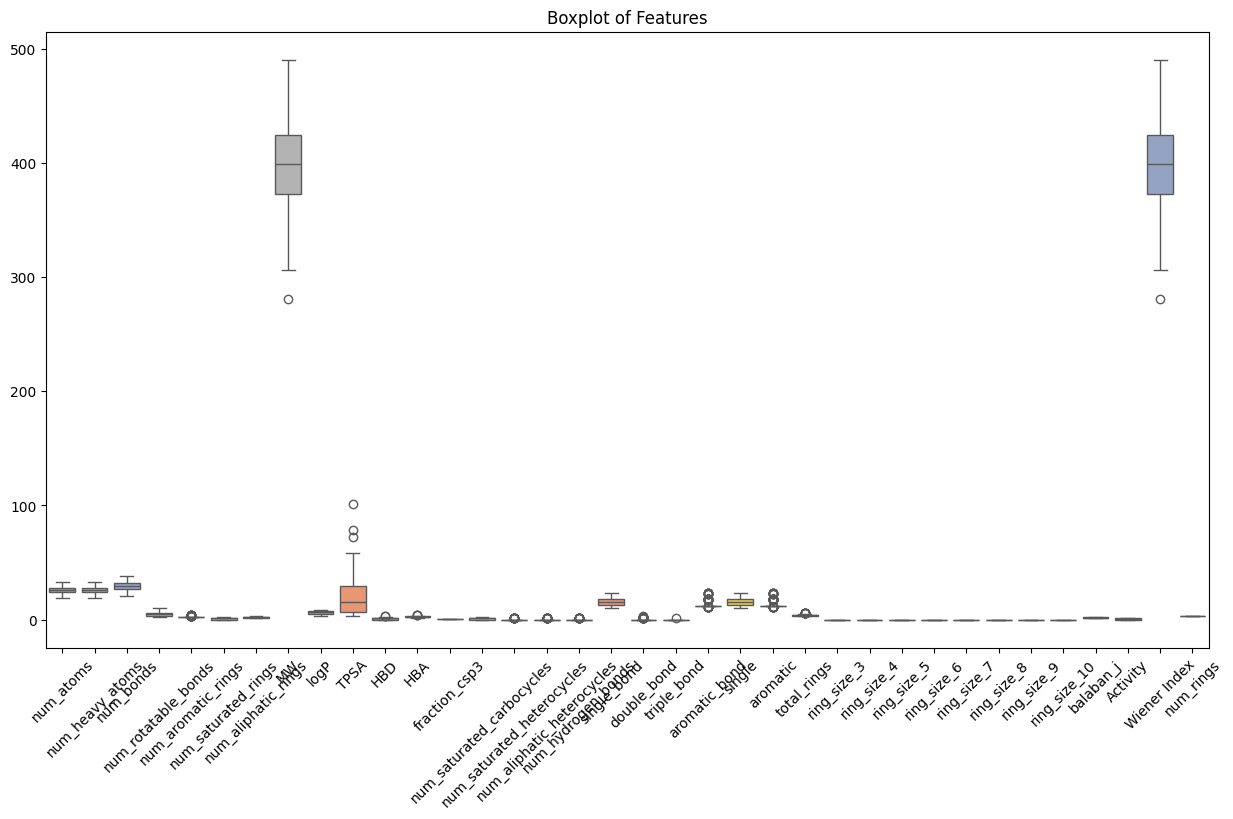

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制每个特征的箱线图
plt.figure(figsize=(15, 8))
sns.boxplot(data=dataframe_features, palette='Set2')
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()


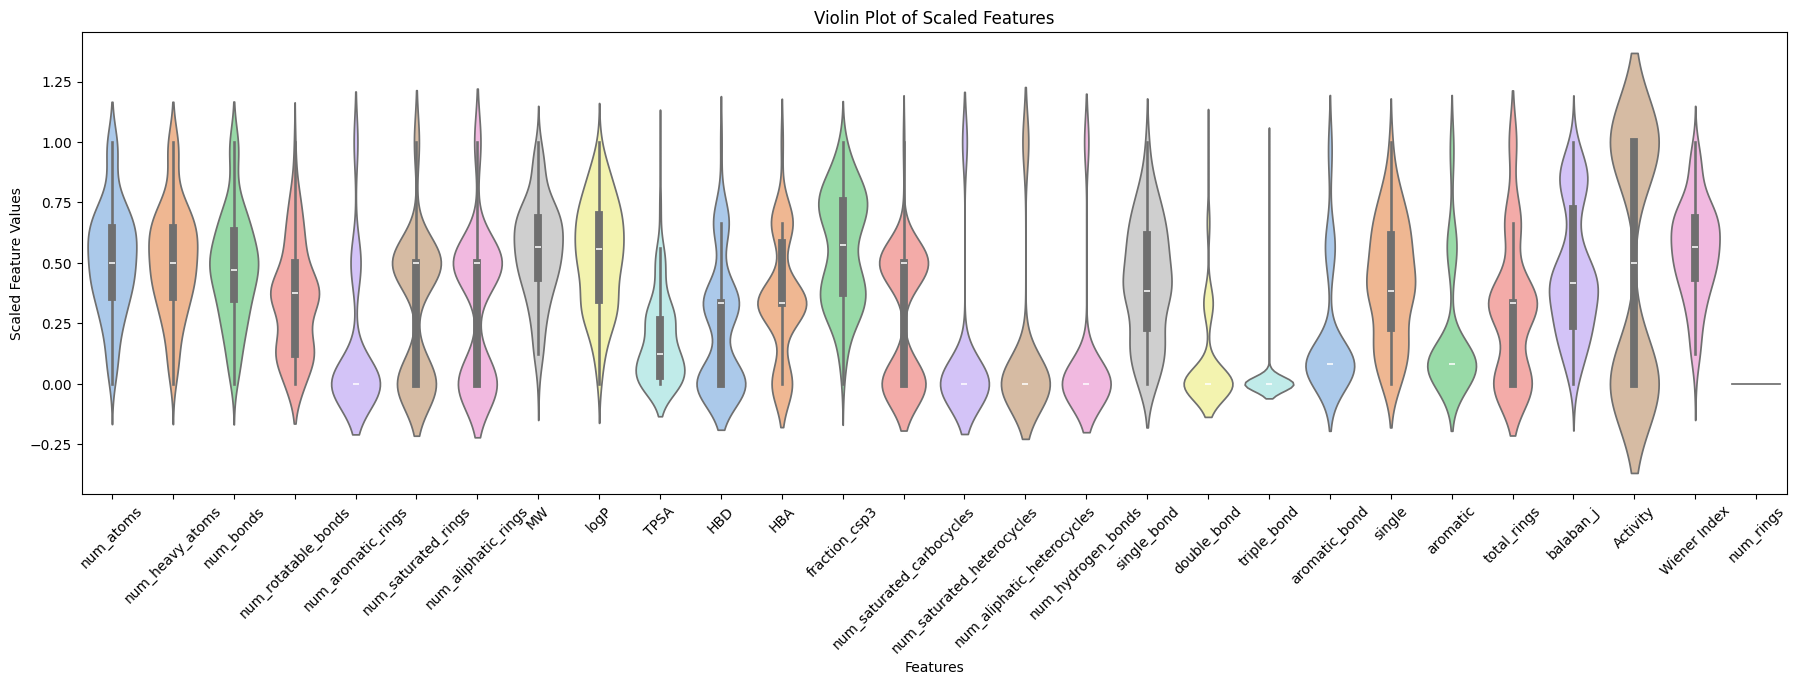

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 假设你已经有了 dataframe_features 和 non_zero_features

# 创建一个 MinMaxScaler 对象
scaler = MinMaxScaler()

# 对非零特征进行最小-最大缩放
scaled_features = scaler.fit_transform(non_zero_features)

# 将缩放后的特征转换回 DataFrame
scaled_dataframe = pd.DataFrame(scaled_features, columns=non_zero_features.columns)

# 自定义颜色映射，确保每个特征都有唯一的颜色
num_features = scaled_dataframe.shape[1]
custom_palette = sns.color_palette("pastel", num_features)

# 绘制缩放后特征的小提琴图
plt.figure(figsize=(22, 6))
sns.violinplot(data=scaled_dataframe, palette=custom_palette)
plt.title('Violin Plot of Scaled Features')
plt.xlabel('Features')
plt.ylabel('Scaled Feature Values')
plt.xticks(rotation=45)
plt.show()


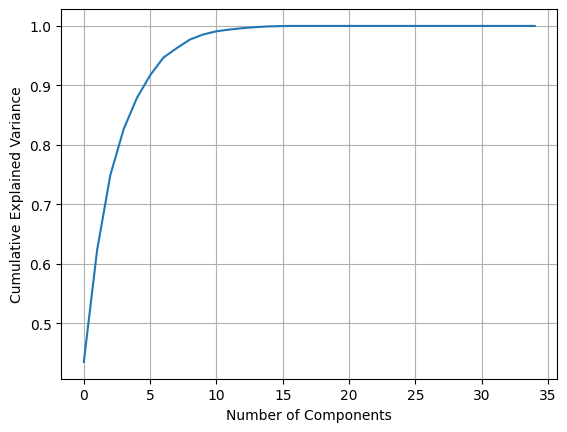

Number of components to explain 95% of variance: 8


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 先对特征进行标准化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataframe_features.drop(columns=['Activity', 'SMILES']))

# 实例化PCA模型
pca = PCA()

# 在标准化后的特征上进行PCA拟合
pca.fit(scaled_features)

# 绘制解释方差比例的累积和曲线
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# 根据累积解释方差比例选择PCA的维度
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1  # 或者选择其他阈值，比如0.95
print("Number of components to explain 95% of variance:", n_components)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 标准化特征
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataframe_features.drop(columns=['Activity', 'SMILES']))

# 实例化PCA并设定要保留的主成分数量
pca = PCA(n_components=8)

# 在标准化后的特征上进行PCA拟合
pca.fit(scaled_features)

# 应用PCA转换
reduced_features = pca.transform(scaled_features)

# 转换后的特征存储在reduced_features中，可以将其用于进一步的分析或建模
print(reduced_features)


[[-5.84084363e+00  1.30682167e-01 -2.22786561e+00 ... -4.14580951e-01
  -4.40270647e-02 -1.24866358e-01]
 [ 4.77555920e+00 -1.77251867e+00  5.45546642e+00 ...  1.13228874e-01
  -6.00079151e-01  1.70191964e-01]
 [-6.00441927e+00 -1.21674235e-01 -2.01599861e-01 ... -2.62039142e-01
   2.72436409e-01 -1.12301516e+00]
 ...
 [ 5.32471539e+00  5.00046330e+00  4.40658591e-03 ...  1.41570622e-01
   2.49283626e-01 -8.25015857e-01]
 [-2.44504385e+00 -5.97539235e-01 -1.28233155e+00 ... -1.75317533e-01
  -1.01031837e+00  1.76023536e-01]
 [-8.97016376e-01  2.76812733e-01  3.24898385e+00 ...  1.33148773e-01
   1.06709782e-01 -1.99547636e-01]]


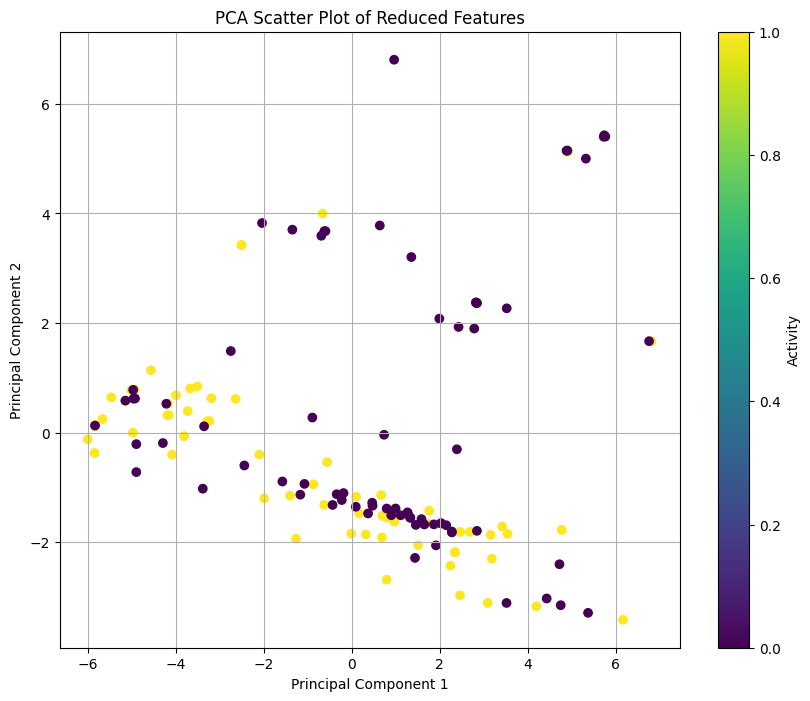

In [ ]:
# Plot scatter plot of the reduced features
plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=dataframe_features['Activity'], cmap='viridis')
plt.title('PCA Scatter Plot of Reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Activity')
plt.grid(True)
plt.show()



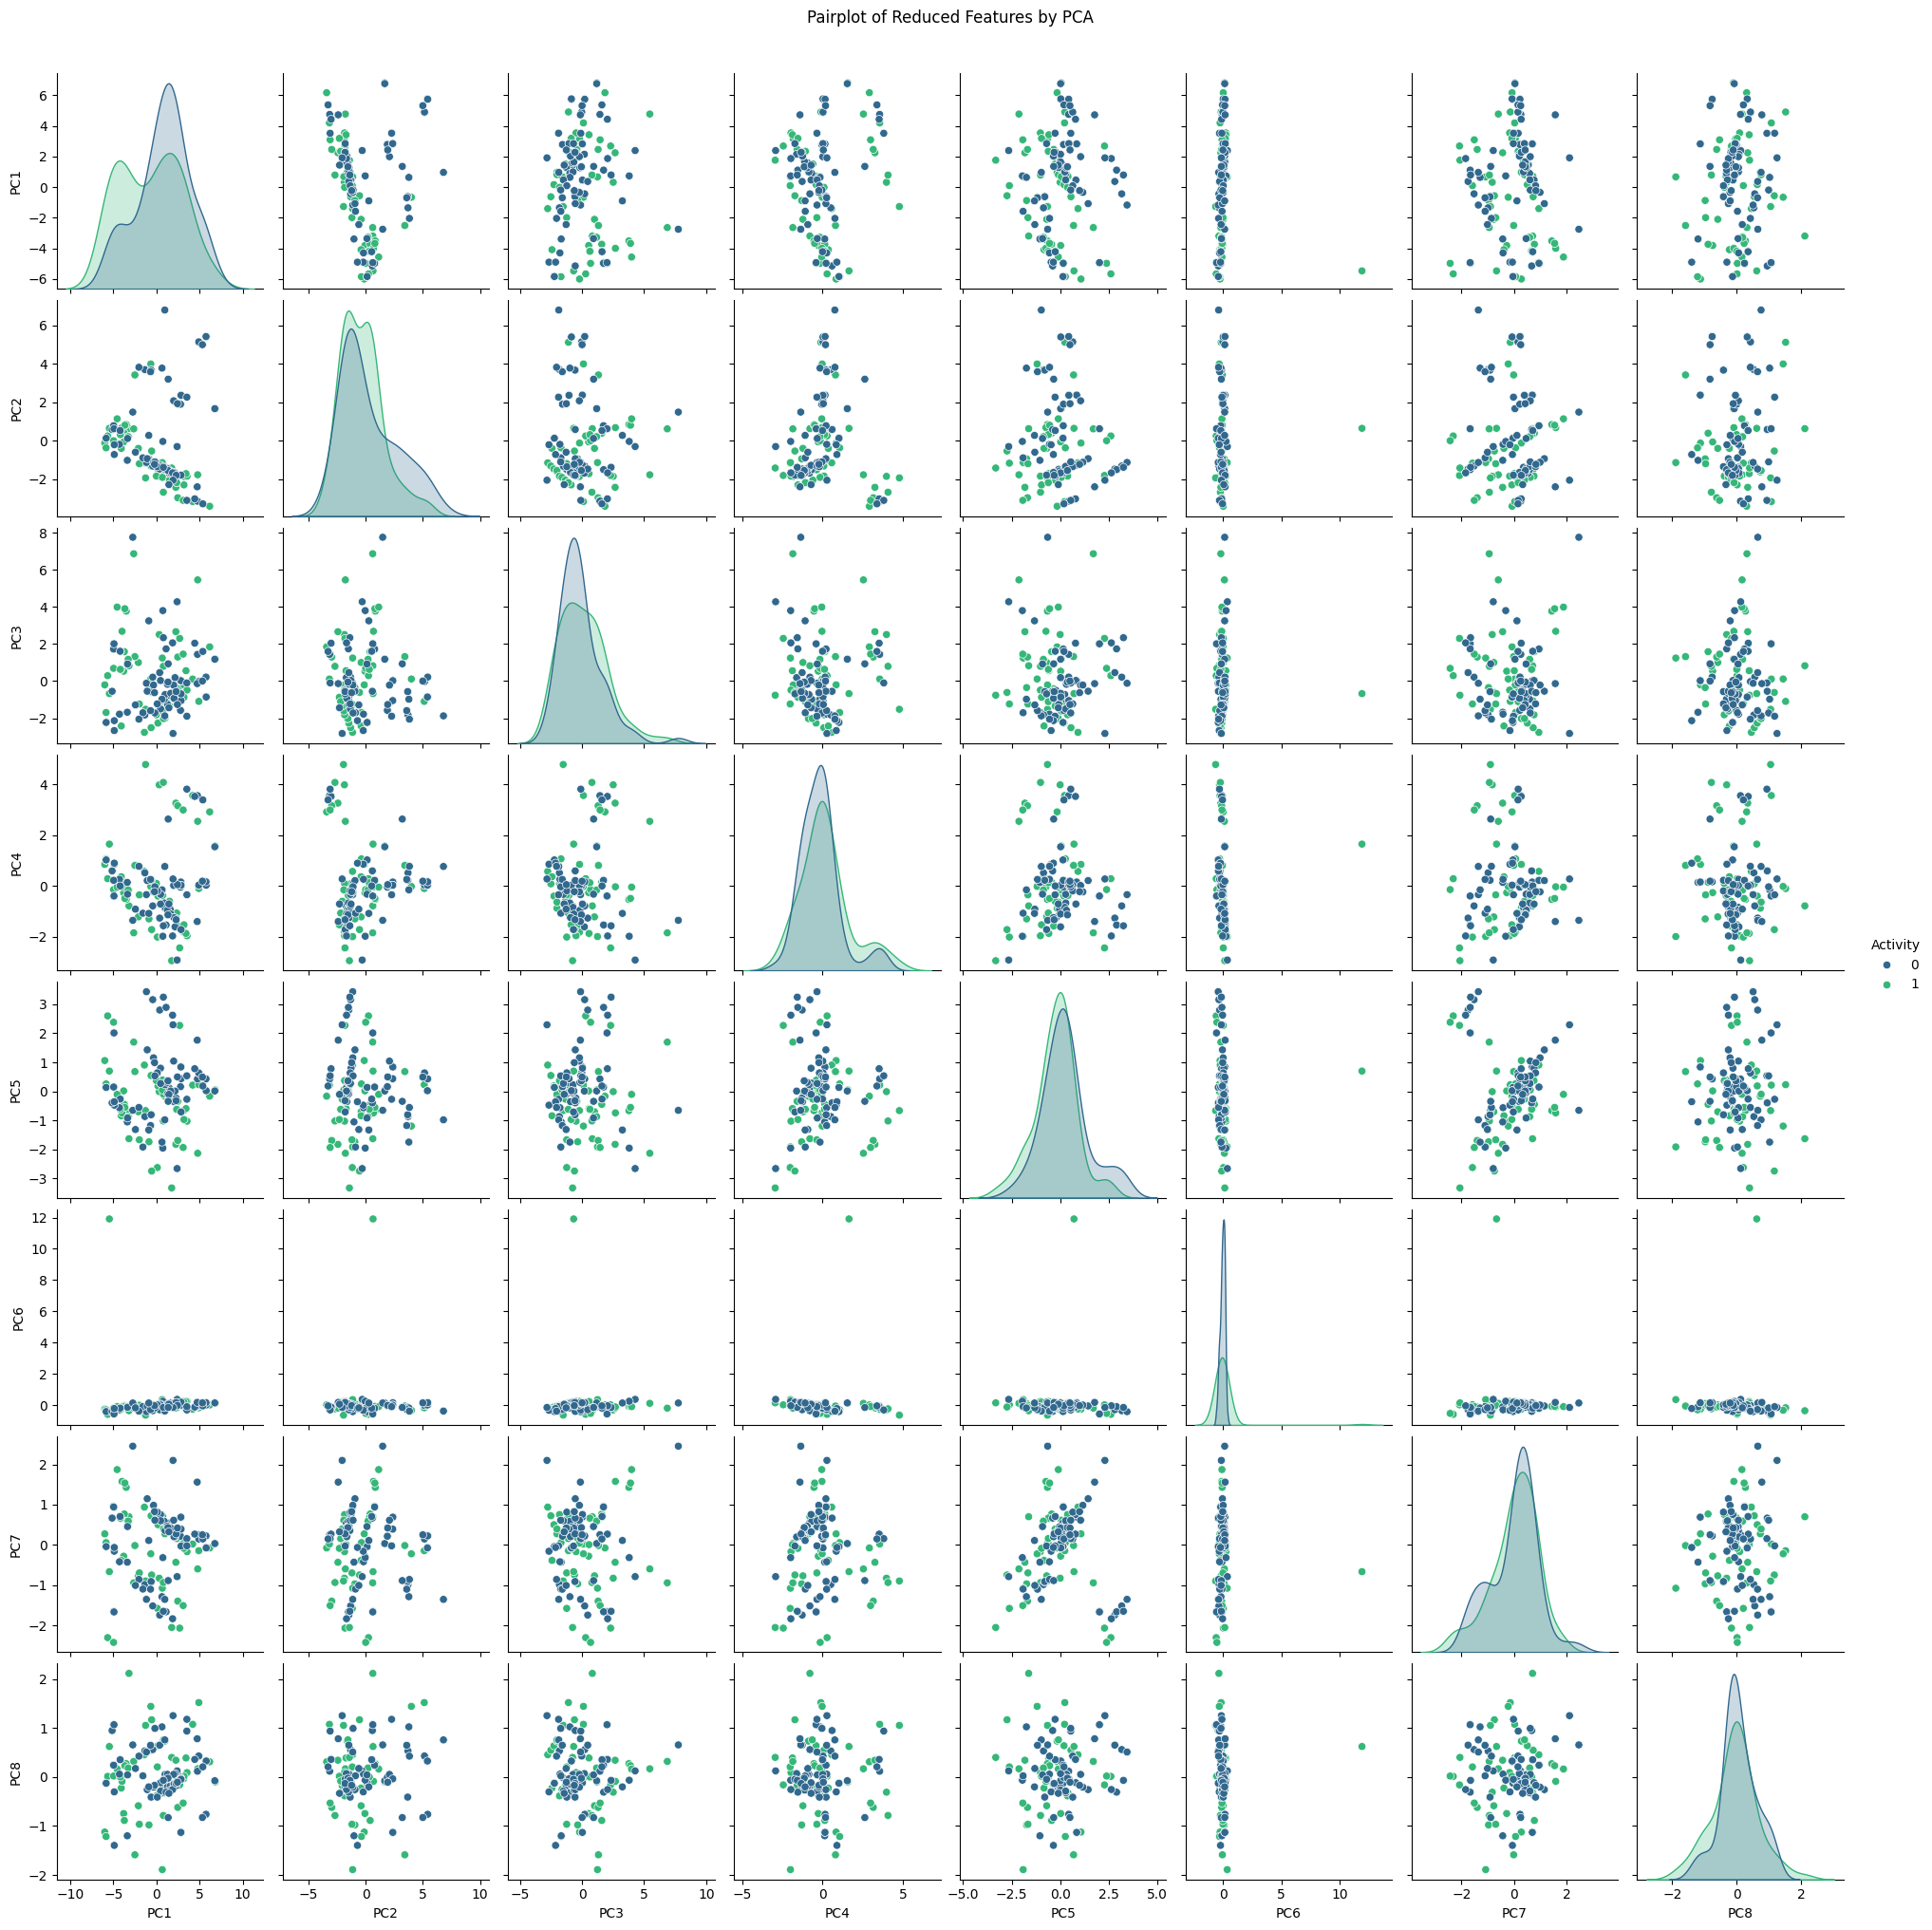

In [ ]:
import seaborn as sns

# Convert reduced features array to DataFrame
reduced_features_df = pd.DataFrame(reduced_features, columns=[f'PC{i+1}' for i in range(reduced_features.shape[1])])

# Add the 'Activity' column to the DataFrame
reduced_features_df['Activity'] = dataframe_features['Activity']

# Plot pairplot
sns.pairplot(reduced_features_df, hue='Activity', palette='viridis')
plt.suptitle('Pairplot of Reduced Features by PCA', y=1.02)
plt.show()


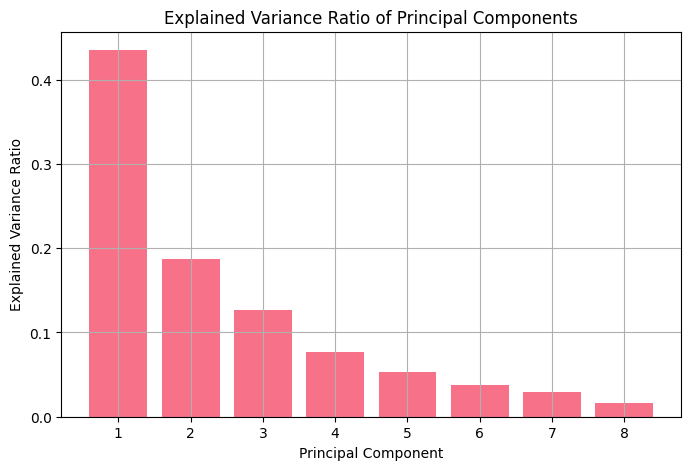

Principal Component 1:

balaban_j: -0.2822934202218153
num_bonds: 0.278178140821434
num_atoms: 0.2704985767968806
num_heavy_atoms: 0.2704985767968803
MW: 0.2653976084888938
Wiener Index: 0.2653976084888938
total_rings: 0.2521557382824545
num_aliphatic_rings: 0.2417432852709355
num_saturated_rings: 0.23397971257201278
single: 0.23370994899355974
single_bond: 0.23370994899355974
num_saturated_carbocycles: 0.21401996814723043
logP: 0.20678279670561966
num_rotatable_bonds: 0.1843693662766044
HBD: -0.16476710663441346
num_aromatic_rings: 0.13078945110357612
aromatic_bond: 0.1270880016748369
aromatic: 0.1270880016748369
fraction_csp3: 0.12525438545009815
double_bond: -0.12069353913014191
num_aliphatic_heterocycles: 0.10651977340973565
TPSA: -0.09723413717677476
HBA: 0.09549765487887875
num_saturated_heterocycles: 0.08559092275187825
triple_bond: -0.03962359475285555
num_hydrogen_bonds: -0.03901772848109219
ring_size_8: 0.0
ring_size_9: 0.0
ring_size_10: 0.0
ring_size_3: 0.0
ring_size_7: 0.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 绘制每个主成分的贡献程度
plt.figure(figsize=(8, 5))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.grid(True)
plt.show()

# 查看每个主成分上的特征权重
feature_names = dataframe_features.drop(columns=['Activity', 'SMILES']).columns
for i in range(pca.n_components_):
    print(f"Principal Component {i+1}:\n")
    component_weights = pca.components_[i]
    sorted_indices = np.argsort(np.abs(component_weights))[::-1]
    for j in sorted_indices:
        print(f"{feature_names[j]}: {component_weights[j]}")
    print("\n")


Accuracy: 0.9333333333333333


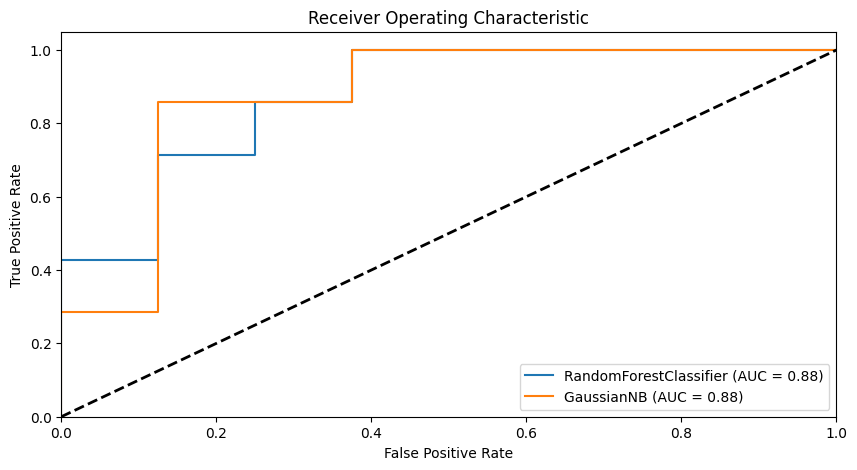

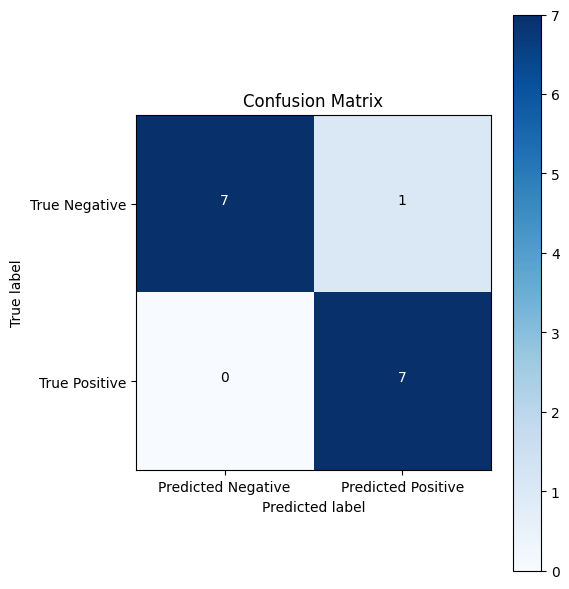

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

X = reduced_features

# 目标变量
y = dataframe_features['Activity']

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11)

# 定义基本模型
models = [
    RandomForestClassifier(n_estimators=50, random_state=38),
    GaussianNB()
]
model = GaussianNB()  # 用适当的模型类名来替换SomeModel

# 生成空特征矩阵
X_meta_train = np.zeros((len(X_train), len(models)))
X_meta_test = np.zeros((len(X_test), len(models)))

# 交叉验证生成元特征
import numpy as np
from sklearn.model_selection import KFold

# 假设你的模型是 model，训练数据是 X_train 和 y_train

# 初始化元特征矩阵
n_splits = 5  # 交叉验证的折数
kf = KFold(n_splits=n_splits, shuffle=True, random_state=10)
X_meta_train = np.zeros((len(y_train), n_splits))
# 初始化元测试特征矩阵
X_meta_test = np.zeros((len(X_test), 0))  # 初始为空矩阵

# 对测试集生成元特征
for i, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    model.fit(X_train_fold, y_train_fold)
    X_meta_train[val_index, i] = model.predict_proba(X_val_fold)[:, 1]

    # 对测试集生成元特征，逐步添加每个模型的预测结果
    X_meta_test = np.append(X_meta_test, model.predict_proba(X_test)[:, 1].reshape(-1, 1), axis=1)

# 定义次级模型
meta_model = RandomForestClassifier(n_estimators=50, random_state=38)
meta_model.fit(X_meta_train, y_train)



# 在测试集上评估模型
y_pred = meta_model.predict(X_meta_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import roc_curve, auc, confusion_matrix

# 绘制 ROC 曲线
plt.figure(figsize=(10, 5))
for i, model in enumerate(models):
    fpr, tpr, _ = roc_curve(y_test, X_meta_test[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 绘制混淆矩阵
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['True Negative', 'True Positive'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(conf_mat[i, j], 'd'), horizontalalignment="center", color="white" if conf_mat[i, j] > conf_mat.max() / 2 else "black")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)


Accuracy: 0.9333333333333333
Precision: 0.875
Recall: 1.0
F1 Score: 0.9333333333333333
Confusion Matrix:
[[7 1]
 [0 7]]


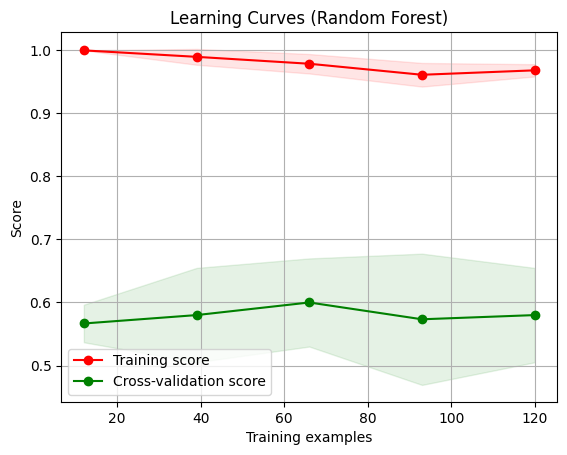

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 定义绘制学习曲线的函数
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# 定义交叉验证的参数
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=44)

# 绘制学习曲线
title = "Learning Curves (Random Forest)"
plot_learning_curve(rf, title, X, y, cv=cv, n_jobs=-1)

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 假设 dataframe_features 是包含特征和目标变量的 DataFrame
X = dataframe_features.drop(columns=['Activity', 'SMILES'])
y = dataframe_features['Activity']

# 创建交互特征
poly = PolynomialFeatures(interaction_only=True)
X_poly = poly.fit_transform(X)

# 将原始特征和交互特征合并
# poly.get_feature_names() 可以获取交互特征的名称
X_combined = np.concatenate((X, X_poly[:, 1:]), axis=1)

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=10)

# 创建随机森林分类器
# 创建带有剪枝参数的随机森林分类器
pruned_rf = RandomForestClassifier(n_estimators=10, max_depth=10, min_samples_split=2, random_state=10)
pruned_rf.fit(X_train, y_train)


# 训练模型
rf.fit(X_train, y_train)

# 在测试集上评估模型性能
accuracy = rf.score(X_test, y_test)
print("模型准确率:", accuracy)


模型准确率: 0.9333333333333333


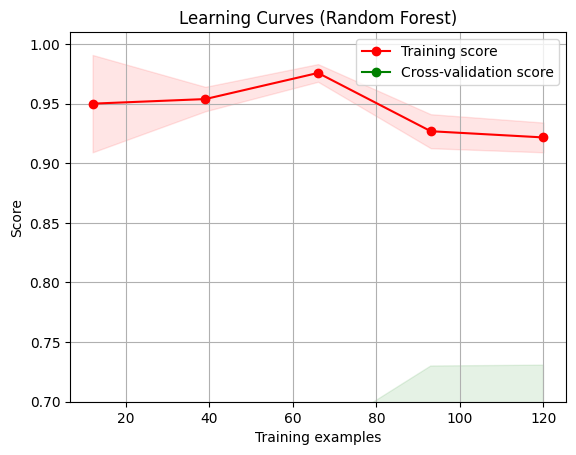

In [ ]:
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise, it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


# 绘制学习曲线
title = "Learning Curves (Random Forest)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(pruned_rf, title, X_combined, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

plt.show()



准确度: 0.9333333333333333
精确度: 0.9411764705882353
召回率: 0.9411764705882353
F1 分数: 0.9411764705882353


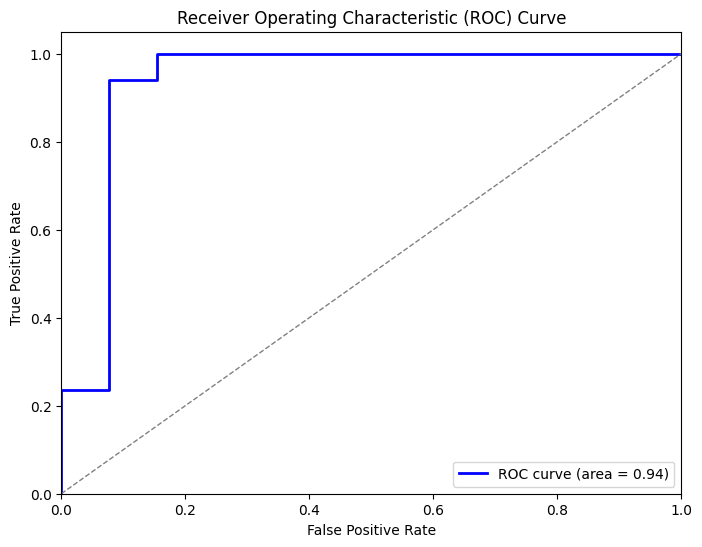

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 使用训练好的模型进行预测
y_pred = rf.predict(X_test)

# 计算准确度
accuracy = accuracy_score(y_test, y_pred)
print("准确度:", accuracy)

# 计算精确度
precision = precision_score(y_test, y_pred)
print("精确度:", precision)

# 计算召回率
recall = recall_score(y_test, y_pred)
print("召回率:", recall)

# 计算F1分数
f1 = f1_score(y_test, y_pred)
print("F1 分数:", f1)

# 计算 ROC 曲线和 AUC
y_proba = rf.predict_proba(X_test)[:, 1]  # 获取正类的概率
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


混淆矩阵:
 [[12  1]
 [ 1 16]]


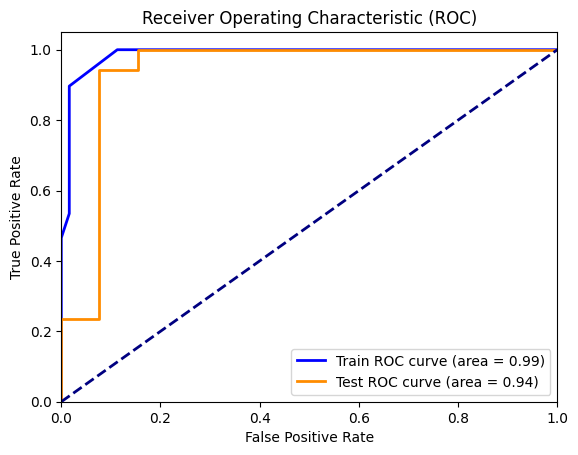

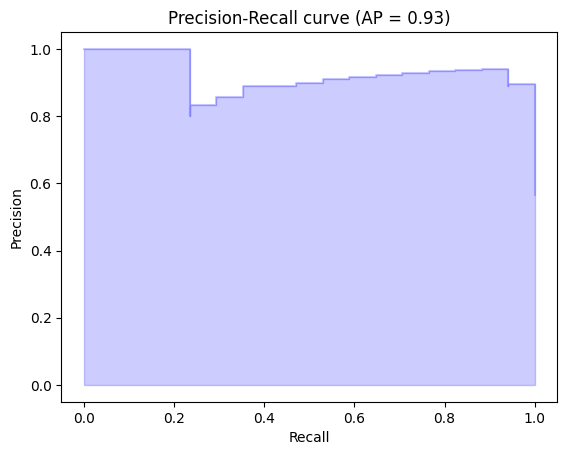

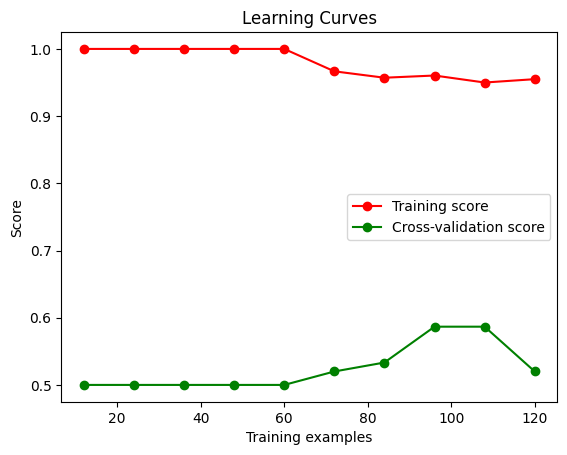

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# 混淆矩阵
conf_matrix = confusion_matrix(y_test, rf.predict(X_test))
print("混淆矩阵:\n", conf_matrix)

# ROC 曲线和 AUC
from sklearn.metrics import roc_curve, auc

# 计算训练集和测试集的预测结果
train_preds = rf.predict_proba(X_train)[:, 1]
test_preds = rf.predict_proba(X_test)[:, 1]

# 计算训练集和测试集的FPR和TPR
train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)

# 计算训练集和测试集的AUC
train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(train_fpr, train_tpr, color='blue', lw=2, label='Train ROC curve (area = %0.2f)' % train_auc)
plt.plot(test_fpr, test_tpr, color='darkorange', lw=2, label='Test ROC curve (area = %0.2f)' % test_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# PR 曲线和 AUCPR
precision, recall, _ = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
average_precision = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.show()

# 学习曲线
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_combined, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.show()




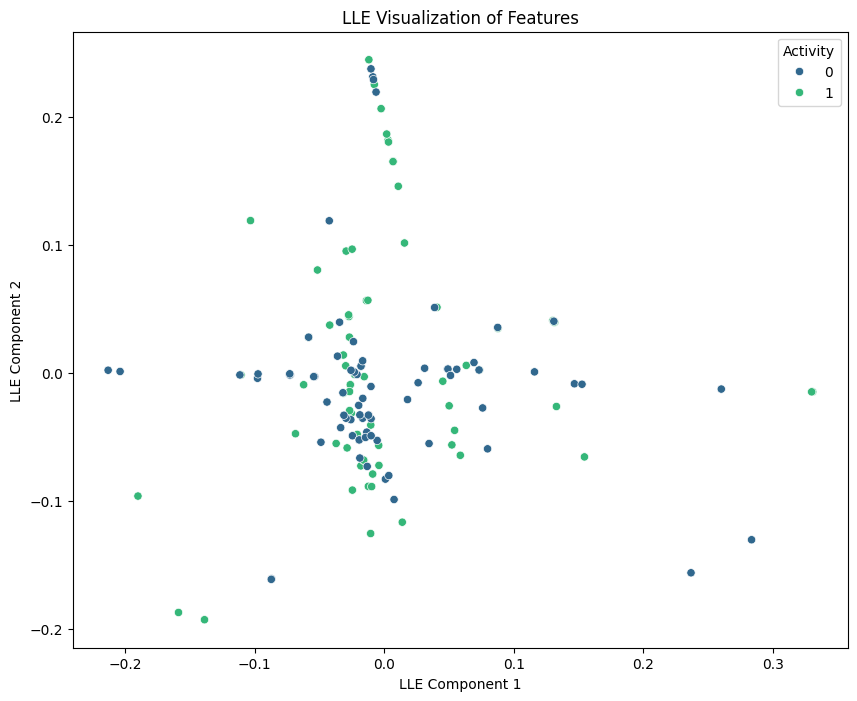

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt
import seaborn as sns

# 提取特征并存储在 DataFrame 中
dataframe_features = extract_features(smiles)
dataframe_features['Activity'] = activities
dataframe_features['SMILES'] = smiles

# 删除非数值列
features = dataframe_features.drop(columns=['Activity', 'SMILES'])

# 数据标准化
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# 使用局部线性嵌入（LLE）进行降维
lle = LocallyLinearEmbedding(n_components=12, n_neighbors=10, random_state=42)  # 将 n_components 设置为 4
features_lle = lle.fit_transform(features_scaled)

# 创建 LLE 降维后的 DataFrame
dataframe_lle = pd.DataFrame(data=features_lle, columns=['LLE Component 1', 'LLE Component 2', 'LLE Component 3', 'LLE Component 4','LLE Component 5', 'LLE Component 6', 'LLE Component 7', 'LLE Component 8','LLE Component 9', 'LLE Component 10', 'LLE Component 11', 'LLE Component 12'])  # 添加两列

# 将 Activity 列添加到 LLE DataFrame 中
dataframe_lle['Activity'] = dataframe_features['Activity']

# 绘制降维后的数据
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LLE Component 8', y='LLE Component 4', hue='Activity', data=dataframe_lle, palette='viridis')
plt.title('LLE Visualization of Features')
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.legend(title='Activity', loc='best')
plt.show()


In [ ]:
print(len(features_lle))
print(len(y_val))


150


NameError: name 'y_val' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV

# 定义随机森林模型
rf_model = RandomForestClassifier(random_state=42)
X = dataframe_lle.drop(columns=['Activity'])
y = dataframe_features['Activity']


# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# 定义超参数网格
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 使用网格搜索进行超参数调优
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 输出最佳参数组合
print("Best Parameters:", grid_search.best_params_)

# 使用最佳参数组合的模型进行预测
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


NameError: name 'RandomForestClassifier' is not defined

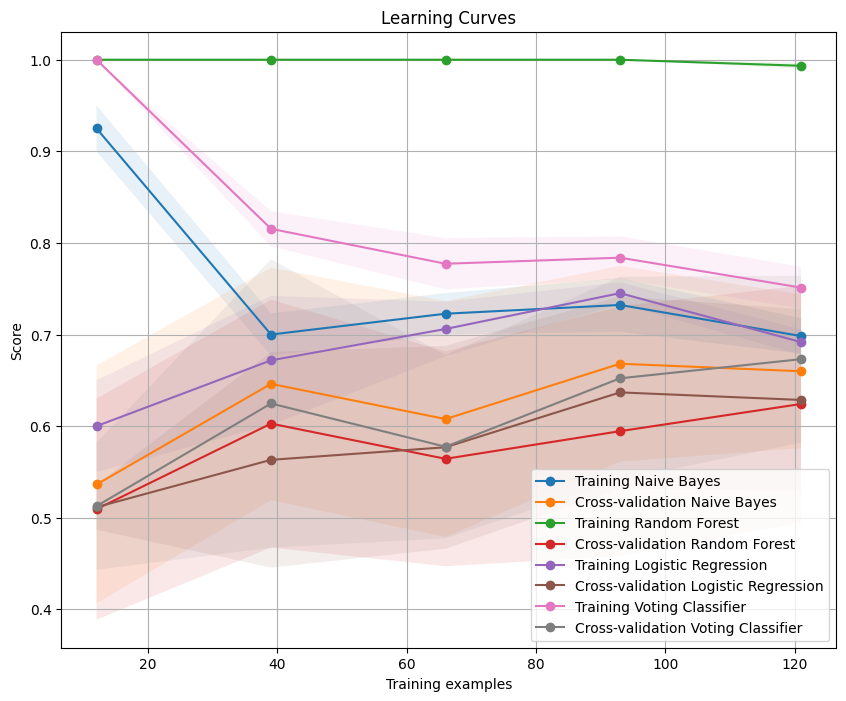

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# 朴素贝叶斯模型
model1 = GaussianNB()

# 随机森林模型
model2 = RandomForestClassifier(random_state=42)

# 逻辑回归模型
model3 = LogisticRegression(random_state=42)

X = dataframe_lle.drop(columns=['Activity'])
y = dataframe_features['Activity']


# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 定义基本模型
model1 = GaussianNB()
model2 = RandomForestClassifier(random_state=42)
model3 = LogisticRegression(random_state=42)

voting_clf = VotingClassifier(estimators=[('nb', model1), ('rf', model2), ('lr', model3)], voting='hard')

# 定义模型列表和标签
models = [model1, model2, model3, voting_clf]
model_labels = ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Voting Classifier']

def plot_learning_curve_multiple(models, model_labels, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 8))
    plt.title("Learning Curves")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    for model, label in zip(models, model_labels):
        train_sizes, train_scores, test_scores = learning_curve(
            model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1)
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
        plt.plot(train_sizes, train_scores_mean, 'o-', label=f"Training {label}")
        plt.plot(train_sizes, test_scores_mean, 'o-', label=f"Cross-validation {label}")

    plt.legend(loc="best")
    return plt

# 绘制多个模型的学习曲线
plot_learning_curve_multiple(models, model_labels, X_train, y_train, cv=10, n_jobs=-1)
plt.show()

Accuracy: 0.6666666666666666


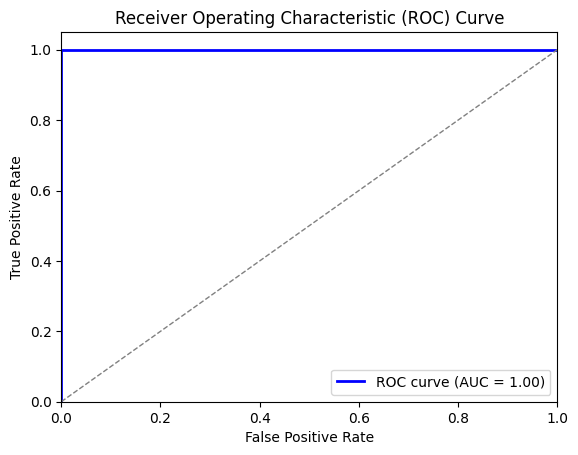

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
X = dataframe_lle.drop(columns=['Activity'])
y = dataframe_features['Activity']

X_train_blend, X_val_blend, y_train_blend, y_val_blend = train_test_split(X_blend_train, y_val, test_size=0.2, random_state=42)

# 定义次级模型
meta_model = LogisticRegression()

# 训练次级模型
meta_model.fit(X_train_blend, y_train_blend)

# 在验证集上评估模型
y_pred_blend = meta_model.predict(X_val_blend)
accuracy_blend = accuracy_score(y_val_blend, y_pred_blend)
print("Accuracy:", accuracy_blend)

# 为每个模型计算 ROC 曲线和 ROC 曲线下面积
fpr_blend, tpr_blend, _ = roc_curve(y_val_blend, meta_model.predict_proba(X_val_blend)[:, 1])
roc_auc_blend = auc(fpr_blend, tpr_blend)

# 绘制 ROC 曲线
plt.figure()
plt.plot(fpr_blend, tpr_blend, color='blue', lw=2, label='ROC curve (AUC = {0:0.2f})'.format(roc_auc_blend))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix:
[[7 0]
 [1 7]]


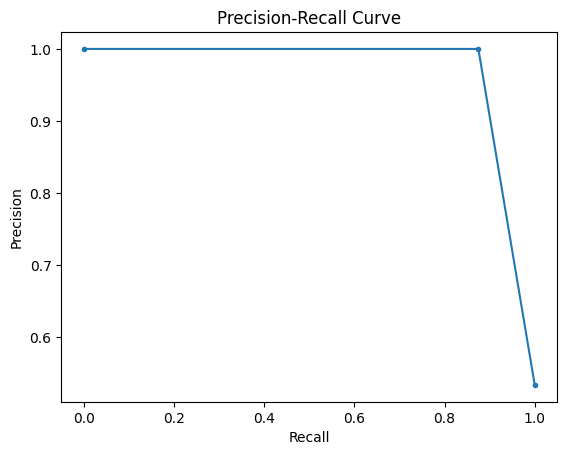

Accuracy: 0.9333333333333333
Precision: 1.0
Recall: 0.875
F1 Score: 0.9333333333333333


In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score

# 1. 绘制混淆矩阵
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 2. 绘制准确率-召回率曲线
precision, recall, _ = precision_recall_curve(y_val, y_pred)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# 3. 计算其他指标
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5


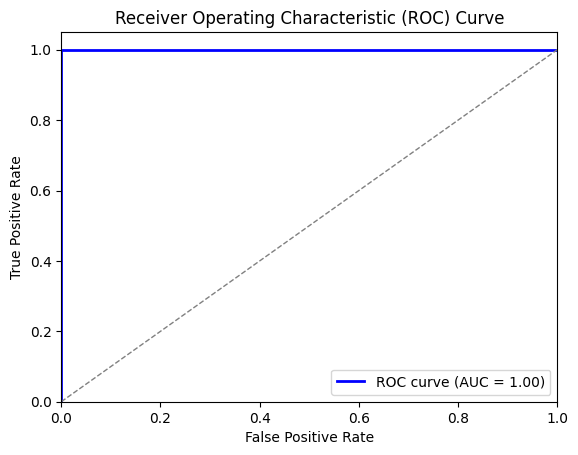

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression

# 假设 X_blend_train 和 y_val 已经定义好了

# 划分训练集和验证集
X_train_blend, X_val_blend, y_train_blend, y_val_blend = train_test_split(X_blend_train, y_val, test_size=0.1, random_state=38)

# 定义次级模型
meta_model = LogisticRegression()

# 训练次级模型
meta_model.fit(X_train_blend, y_train_blend)

# 在验证集上评估模型
y_pred_blend = meta_model.predict(X_val_blend)
accuracy_blend = accuracy_score(y_val_blend, y_pred_blend)
print("Accuracy:", accuracy_blend)

# 为每个模型计算 ROC 曲线和 ROC 曲线下面积
fpr_blend, tpr_blend, _ = roc_curve(y_val_blend, meta_model.predict_proba(X_val_blend)[:, 1])
roc_auc_blend = auc(fpr_blend, tpr_blend)

# 绘制 ROC 曲线
plt.figure()
plt.plot(fpr_blend, tpr_blend, color='blue', lw=2, label='ROC curve (AUC = {0:0.2f})'.format(roc_auc_blend))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix:
[[7 0]
 [1 7]]


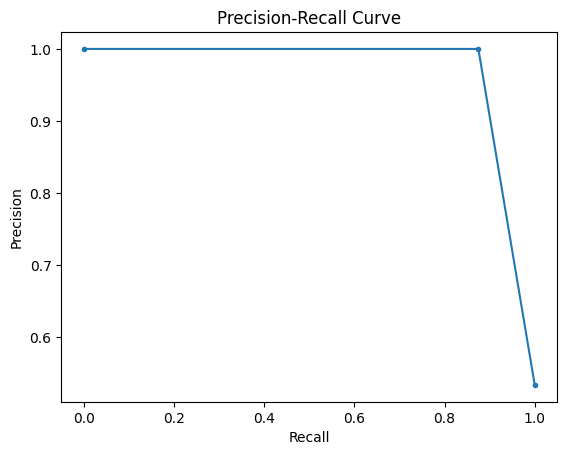

Accuracy: 0.9333333333333333
Precision: 1.0
Recall: 0.875
F1 Score: 0.9333333333333333


In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score

# 1. 绘制混淆矩阵
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 2. 绘制准确率-召回率曲线
precision, recall, _ = precision_recall_curve(y_val, y_pred)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# 3. 计算其他指标
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9333333333333333


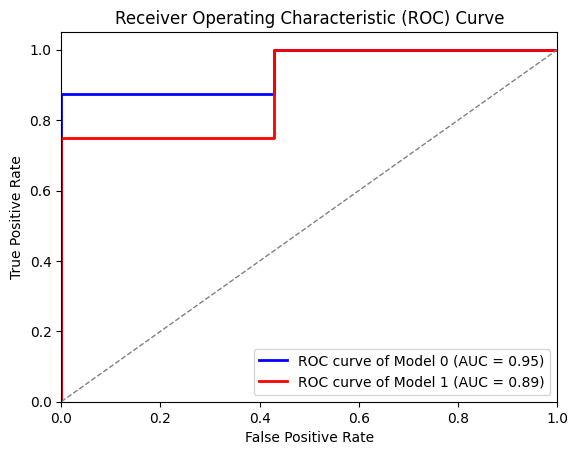

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression

# 假设 X 和 y 已经定义好了
X = dataframe_features.drop(columns=['Activity', 'SMILES'])
y = dataframe_features['Activity']
# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=38)

# 定义基本模型
models = [
    GaussianNB(),  # 朴素贝叶斯模型
    RandomForestClassifier(n_estimators=100, random_state=42)  # 随机森林模型
]

# 生成空特征矩阵
X_blend_train = np.zeros((len(X_val), len(models)))
X_blend_val = np.zeros((len(X_val), len(models)))

# 生成验证集上的基本模型预测结果
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    X_blend_train[:, i] = model.predict_proba(X_val)[:, 1]
    X_blend_val[:, i] = model.predict_proba(X_val)[:, 1]

# 定义次级模型
meta_model = LogisticRegression()

# 训练次级模型
meta_model.fit(X_blend_train, y_val)

# 在验证集上评估模型
y_pred = meta_model.predict(X_blend_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# 为每个模型计算 ROC 曲线和 ROC 曲线下面积
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, model in enumerate(models):
    y_score = model.predict_proba(X_val)[:, 1]
    fpr[i], tpr[i], _ = roc_curve(y_val, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# 绘制 ROC 曲线
plt.figure()
colors = ['blue', 'red']
for i, color in zip(range(len(models)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of Model {0} (AUC = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Epoch 1/50
4/4 [==============================] - 1s 72ms/step - loss: 0.1562 - val_loss: 0.1511
Epoch 2/50
4/4 [==============================] - 0s 13ms/step - loss: 0.1556 - val_loss: 0.1505
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1550 - val_loss: 0.1500
Epoch 4/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1544 - val_loss: 0.1495
Epoch 5/50
4/4 [==============================] - 0s 13ms/step - loss: 0.1539 - val_loss: 0.1489
Epoch 6/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1533 - val_loss: 0.1484
Epoch 7/50
4/4 [==============================] - 0s 13ms/step - loss: 0.1528 - val_loss: 0.1479
Epoch 8/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1522 - val_loss: 0.1474
Epoch 9/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1517 - val_loss: 0.1469
Epoch 10/50
4/4 [==============================] - 0s 11ms/step - loss: 0.1512 - val_loss: 0.1464
Epoch 11/50
4/4 [============

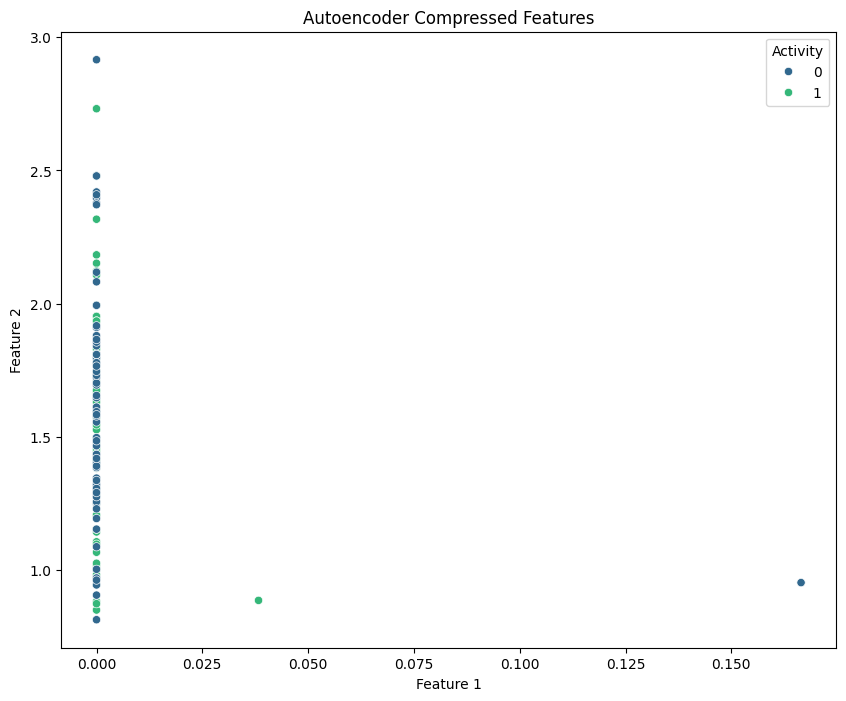

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler

# 准备数据并进行标准化处理
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dataframe_features.drop(columns=['Activity', 'SMILES']))

# 构建自编码器模型
input_dim = scaled_features.shape[1]
encoding_dim = 2  # 设置编码维度
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)

# 编译自编码器模型
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# 训练自编码器模型
autoencoder.fit(scaled_features, scaled_features, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

# 提取压缩特征
encoder = Model(input_layer, encoded)
compressed_features = encoder.predict(scaled_features)

# 创建DataFrame存储压缩特征
compressed_df = pd.DataFrame(data=compressed_features, columns=['Feature 1', 'Feature 2'])

# 将Activity列添加到DataFrame中
compressed_df['Activity'] = dataframe_features['Activity']

# 可视化压缩特征
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Activity', data=compressed_df, palette='viridis')
plt.title('Autoencoder Compressed Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Activity', loc='best')
plt.show()


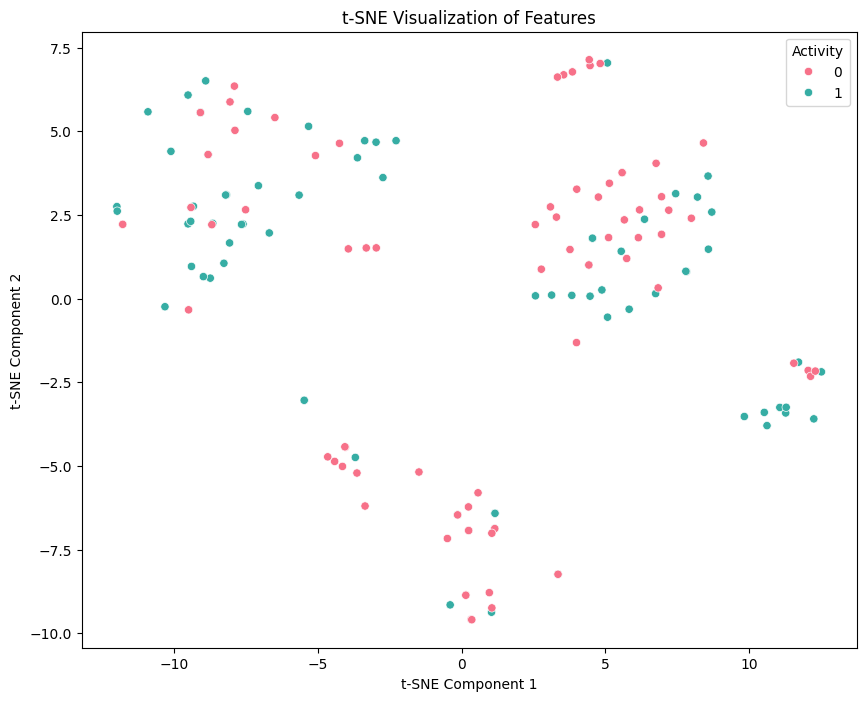

In [ ]:
from sklearn.manifold import TSNE

# Extract feature vectors and remove non-numeric columns
features = dataframe_features.drop(columns=['Activity', 'SMILES'])

# Normalize feature vectors
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(features_scaled)

# Create DataFrame for t-SNE reduced data
dataframe_tsne = pd.DataFrame(data=features_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Add the 'Activity' column to the t-SNE DataFrame
dataframe_tsne['Activity'] = dataframe_features['Activity']

# Define custom color palette
custom_palette = sns.color_palette('husl', n_colors=len(dataframe_features['Activity'].unique()))

# Plot the data after t-SNE dimensionality reduction
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='Activity', data=dataframe_tsne, palette=custom_palette)
plt.title('t-SNE Visualization of Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Activity', loc='best')
plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 使用随机森林模型获取特征重要性
X = dataframe_features.drop(columns=['Activity', 'SMILES'])
y = dataframe_features['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
print("Feature Importances:", feature_importances)

# 拟合线性模型并观察性能
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Linear Regression):", mse_lr)

# 多项式特征变换并观察性能
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

lr_model_poly = LinearRegression()
lr_model_poly.fit(X_train_poly, y_train)
y_pred_poly = lr_model_poly.predict(X_test_poly)
mse_lr_poly = mean_squared_error(y_test, y_pred_poly)
print("Mean Squared Error (Polynomial Regression):", mse_lr_poly)

Feature Importances: [0.01659633 0.01231777 0.02768974 0.03254018 0.01213498 0.00327108
 0.0034269  0.04671119 0.11711812 0.07137477 0.04596147 0.02436602
 0.13104165 0.01550297 0.01535438 0.00071552 0.01211393 0.01701568
 0.00890152 0.00034468 0.0266881  0.0198268  0.02615073 0.00288929
 0.         0.         0.         0.         0.         0.
 0.         0.         0.2629657  0.04698051 0.        ]
Mean Squared Error (Linear Regression): 0.37375688045225347
Mean Squared Error (Polynomial Regression): 167.69062916046184
